In [32]:
import os
import pandas as pd
import hvplot.pandas
import seaborn as sns
from pathlib import Path
import csv
import matplotlib.pyplot as plt

In [35]:
rate_path = 'effective_rate.csv'
fed_path = 'total_assets.csv'
cpi_path = 'CPI.csv'

In [39]:
rate = pd.read_csv(rate_path)
fed = pd.read_csv(fed_path)
cpi = pd.read_csv(cpi_path)

In [22]:
rate.head()

,effective_rate
date,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83


In [49]:
cpi.tail()

,CPI
date,
2023-02-01,301.648
2023-03-01,301.808
2023-04-01,302.918
2023-05-01,303.294
2023-06-01,303.841


In [ ]:
cpi['date'] = pd.to_datetime(cpi['date'])
cpi.set_index('date', inplace=True)
cpi.tail

In [59]:
cpi['CPI_yr'] = cpi['CPI'].diff(periods=12)
cpi = cpi.drop(columns=['CPI', 'CPI_change'])
cpi.tail(15)

,CPI_yr
date,
2022-04-01,21.941
2022-05-01,22.824
2022-06-01,24.169
2022-07-01,22.864
2022-08-01,22.450
2022-09-01,22.511
2022-10-01,21.465
2022-11-01,19.887
2022-12-01,18.103


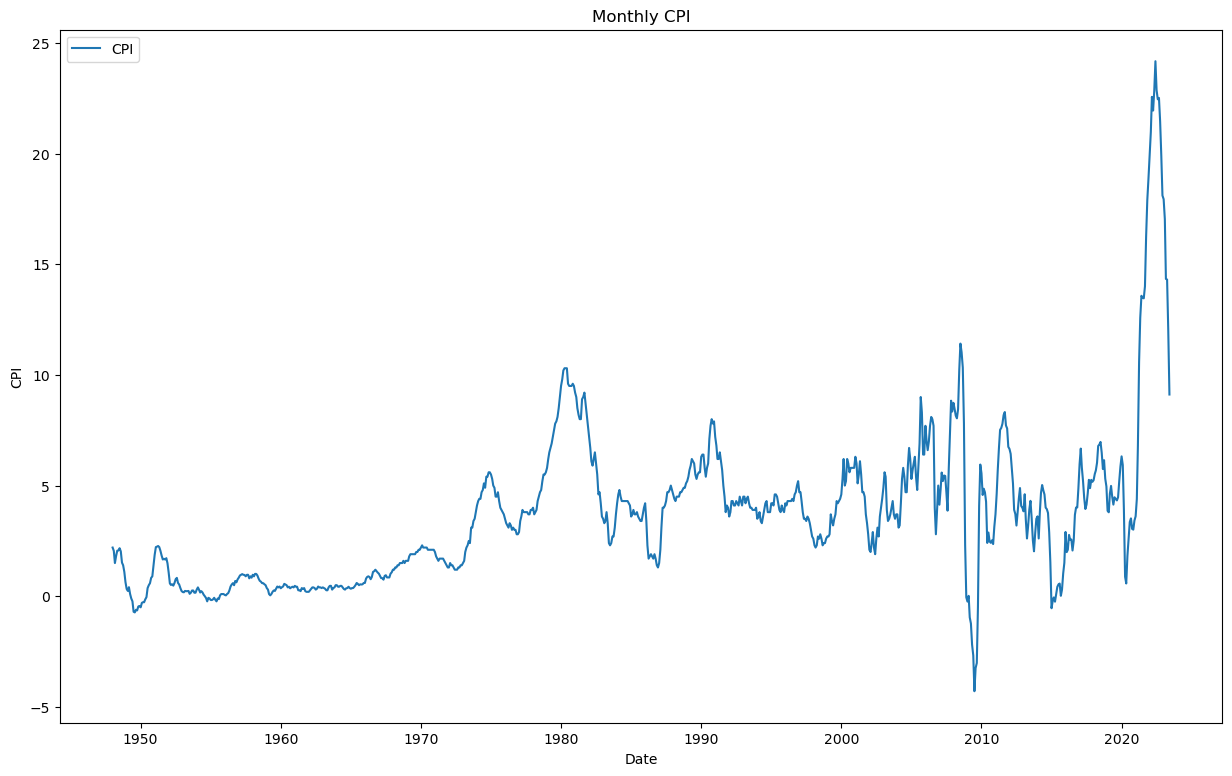

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 9))

plt.plot(cpi.index, cpi['CPI_yr'], label='CPI')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('Monthly CPI')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [20]:
rate['date'] = pd.to_datetime(rate['date'])
fed['date'] = pd.to_datetime(fed['date'])
rate.set_index('date', inplace=True)
fed.set_index('date', inplace=True)

In [26]:
concat = rate.merge(fed, on='date', how='outer')
concat.tail()

,effective_rate,total_assets
date,,
2023-03-01,4.65,8552199.0
2023-04-01,4.83,8600803.0
2023-05-01,5.06,8457176.0
2023-06-01,5.08,8370156.0
2023-07-01,5.12,8278283.0


In [60]:
three = concat.merge(cpi, on='date', how='inner')

In [61]:
norm_three = (three - three.min()) / (three.max() - three.min())

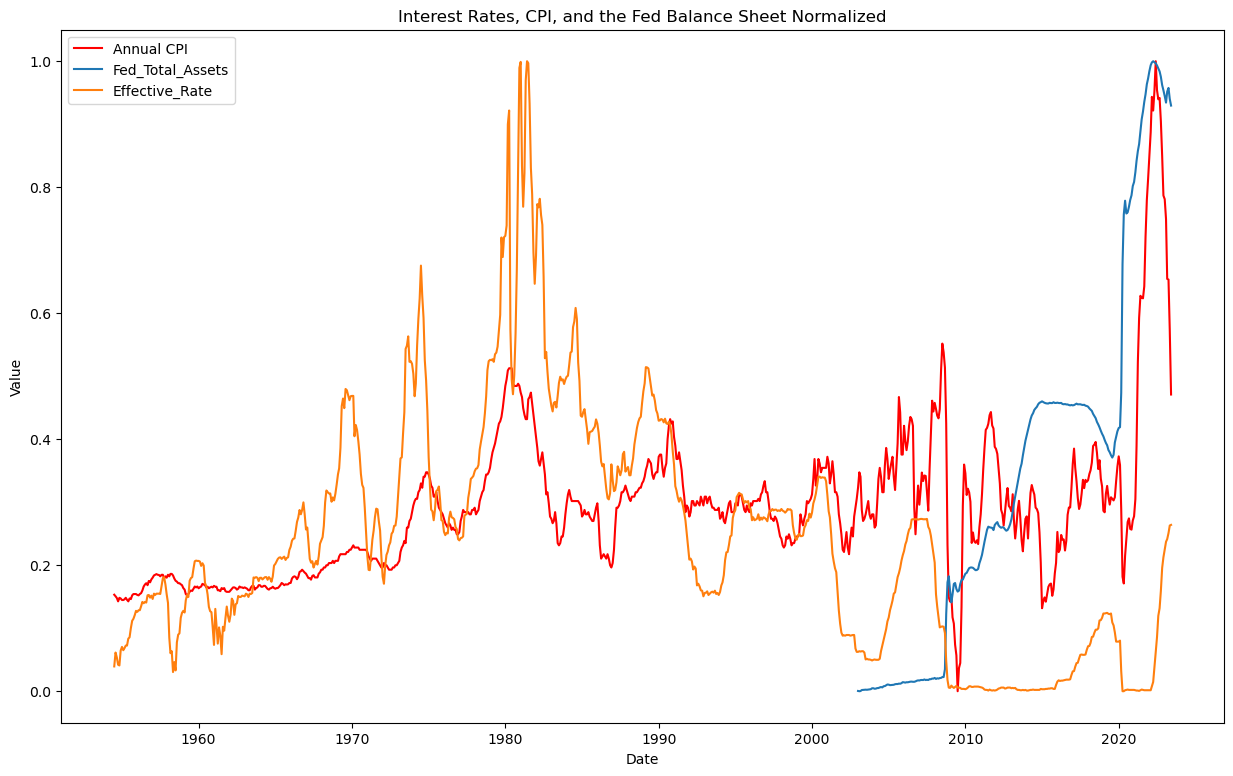

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 9))

plt.plot(norm_three.index, norm_three['CPI_yr'], c='r', label='Annual CPI')
plt.plot(norm_three.index, norm_three['total_assets'], label='Fed_Total_Assets')
plt.plot(norm_three.index, norm_three['effective_rate'], label='Effective_Rate')



# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Interest Rates, CPI, and the Fed Balance Sheet Normalized')

# Add a legend
plt.legend()

# Show the plot
plt.show()


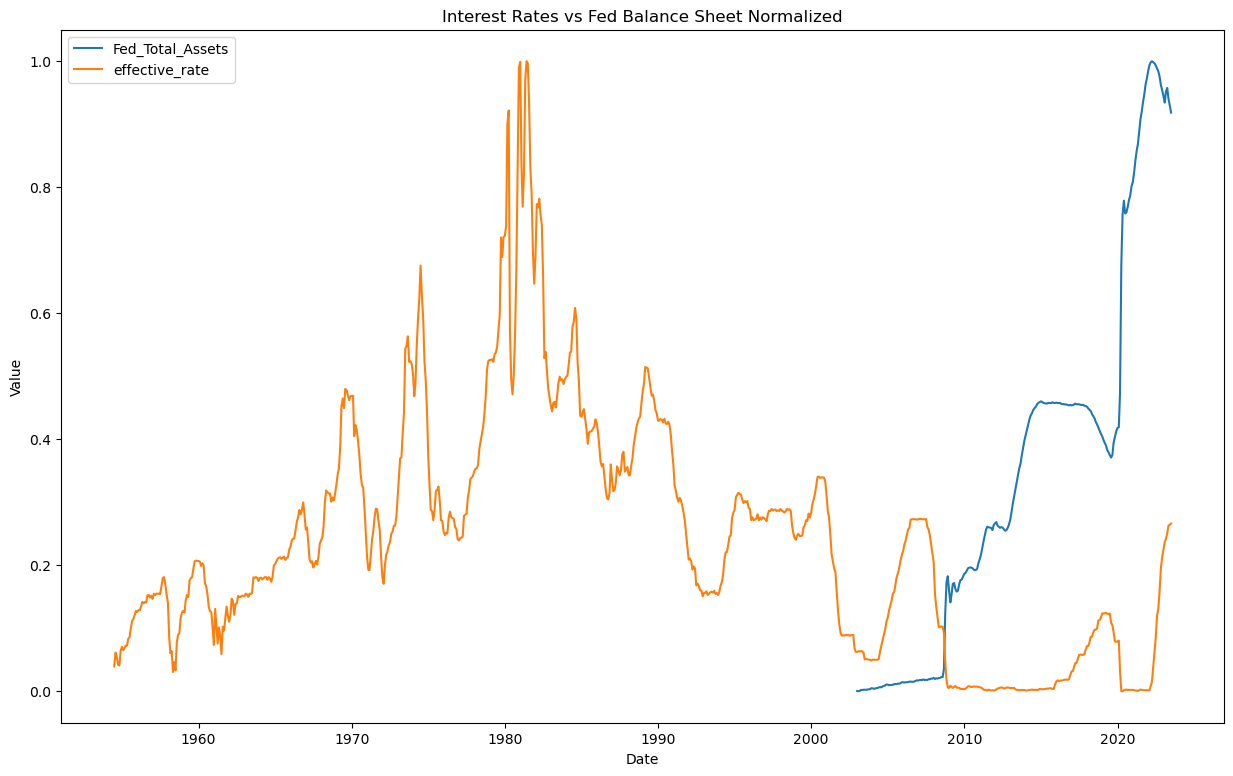

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 9))
# Line plot for Asset1_Price
plt.plot(norm.index, norm['total_assets'], label='Fed_Total_Assets')

# Line plot for Asset2_Price
plt.plot(norm.index, norm['effective_rate'], label='effective_rate')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Interest Rates vs Fed Balance Sheet Normalized')

# Add a legend
plt.legend()

# Show the plot
plt.show()
